In [1]:
import pandas as pd
import numpy as np
import urllib.request
import requests
import os

In [2]:
d = pd.read_csv('data.csv', sep='\t', header = 0)

C:\Users\Aditya\Miniconda2\envs\py3point6\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
d1 = d[['tconst', 'titleType', 'originalTitle', 'startYear', 'genres']]

In [5]:
d1 = d1.loc[d1.titleType =='movie']

In [6]:
len(d1)

505039

In [7]:
d1 = d1.dropna()

In [8]:
d3 = d1.loc[(d1.startYear.str.contains('196')) | (d1.startYear.str.contains('197')) | (d1.startYear.str.contains('198')) | (d1.startYear.str.contains('199')) | (d1.startYear.str.contains('200')) | (d1.startYear.str.contains('201'))]

In [9]:
d3  = d3.sort_values('startYear')

In [10]:
d5 = d3.loc[d3.genres.str.contains('Documentary') == False]

In [11]:
len(d5)

269662

In [12]:
full_list = d5.loc[d5.startYear > '2012']

In [13]:
len(full_list)

68588

In [14]:
full_list_1 = full_list.loc[(full_list.genres.str.contains('Talk-Show') == False) & (full_list.genres.str.contains('Adult') == False) & (full_list.genres.str.contains('News') == False) & (full_list.genres.str.contains('Western') == False) & (full_list.genres.str.contains('Reality-TV') == False) & (full_list.genres.str.contains('Short') == False) & (full_list.genres.str.contains('Game-Show') == False)]

In [15]:
len(full_list_1)

67817

In [16]:
import re

In [17]:
full_list_1.head(11)

,tconst,titleType,originalTitle,startYear,genres
4313807,tt6964088,movie,201314,2013,\N
4336272,tt7012128,movie,"L'acteur, l'arnaqueur",2013,Action
4404919,tt7158090,movie,Killing 7,2013,Thriller
4478728,tt7315746,movie,Jeolmeun eomma,2013,"Drama,Romance"
4361583,tt7066046,movie,Left,2013,\N
4277603,tt6886920,movie,The Bringer of Light,2013,"Horror,Sci-Fi"
4313389,tt6963172,movie,Tjuvgods,2013,\N
5286823,tt9032082,movie,M-Agent,2013,"Horror,Mystery,Thriller"
2929940,tt3887836,movie,A Blossom of Love in Gannan,2013,Romance
4290679,tt6915090,movie,Pavithra,2013,Thriller


In [18]:
full_list_1['genres_2'] = full_list_1['genres'].apply(re.compile(r'\\N').search)

C:\Users\Aditya\Miniconda2\envs\py3point6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
full_list_2 = full_list_1.loc[full_list_1.genres_2.isnull()]

In [20]:
len(full_list_2)

63670

In [21]:
full_list_2 = full_list_2.reset_index()

In [22]:
full_list_2 = full_list_2.drop(['index'], axis=1)

In [23]:
len(full_list_2)

63670

In [24]:
genres_list = []

In [25]:
for j in full_list_2['genres']:
    words = j.split(',')
    for k in words:
        if k not in genres_list:
            genres_list.append(k)

In [26]:
len(genres_list)

19

In [27]:
genres_list

['Action',
 'Thriller',
 'Drama',
 'Romance',
 'Horror',
 'Sci-Fi',
 'Mystery',
 'Adventure',
 'Animation',
 'Crime',
 'Comedy',
 'Fantasy',
 'Family',
 'Music',
 'History',
 'War',
 'Musical',
 'Biography',
 'Sport']

In [28]:
genres_dict = {}

In [29]:
for j in full_list_2['genres']:
    words = j.split(',')
    for k in words:
        if k not in genres_dict:
            genres_dict[k] = 1
        else:
            genres_dict[k] += 1            

In [30]:
genres_dict

{'Action': 6865,
 'Thriller': 8874,
 'Drama': 31832,
 'Romance': 6305,
 'Horror': 7809,
 'Sci-Fi': 2540,
 'Mystery': 3208,
 'Adventure': 3241,
 'Animation': 2019,
 'Crime': 4399,
 'Comedy': 16691,
 'Fantasy': 2470,
 'Family': 3088,
 'Music': 1193,
 'History': 1229,
 'War': 579,
 'Musical': 816,
 'Biography': 1467,
 'Sport': 637}

In [31]:
full_list_2 = full_list_2.drop(['genres_2'], axis = 1)

In [32]:
genres_list.append('Movie_ID')
genres_list.append('Numpy_Img')

In [33]:
genres_df = pd.DataFrame(columns=genres_list, index=range(30000))

In [34]:
subset_df = full_list_2.loc[:1000]

In [35]:
KEY = 'a997c6a74e5b2d33c1e329b556a1769d'

In [36]:
count_var = 0

In [37]:
import cv2
from IPython.display import Image 
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
#from scikit-image import io

In [38]:
for index, i in subset_df.iterrows():
    IMG_PATTERN = 'http://api.themoviedb.org/3/movie/{imdbid}/images?api_key={key}' 
    r = requests.get(IMG_PATTERN.format(key=KEY,imdbid=i[0]))
    api_response = r.json()
    try:
        posters = api_response['posters']
    except KeyError:
        continue
    
    base_url = 'http://image.tmdb.org/t/p/'
    max_size = 'w342'
    try:
        rel_path = posters[0]['file_path']
    except IndexError:
        continue
    url = "{0}{1}{2}".format(base_url, max_size, rel_path) 
      
    try:
        resp = urllib.request.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype='uint8')
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)  
        new_img = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
        someRowNumber = count_var
        words = i[4].split(',')
        genres_df.loc[genres_df.index[someRowNumber], 'Movie_ID'] = i[0]
        genres_df.loc[genres_df.index[someRowNumber], 'Numpy_Img'] = new_img
        for k in words:
            genres_df.loc[genres_df.index[someRowNumber], k] = 1.0
        count_var += 1
    except urllib.error.URLError as e:
        print(e.reason)       
    

In [39]:
collected_images = genres_df.loc[genres_df['Numpy_Img'].notnull()]

In [40]:
collected_images = collected_images.drop(['Movie_ID'], axis = 1)

In [41]:
len(collected_images)

68

In [42]:
collected_images.head()

,Action,Thriller,Drama,Romance,Horror,Sci-Fi,Mystery,Adventure,Animation,Crime,Comedy,Fantasy,Family,Music,History,War,Musical,Biography,Sport,Numpy_Img
0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[4, 0, 1], [4, 0, 0], [4, 0, 0], [3, 1, 0], ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[58, 194, 170], [58, 194, 170], [58, 194, 17..."
2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[17, 27, 27], [13, 23, 23], [9, 19, 19], [7,..."
3,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[235, 235, 235], [239, 239, 239], [228, 228,..."
4,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[235, 234, 238], [236, 235, 239], [236, 235,..."


In [43]:
collected_images_df = collected_images.fillna(0)

In [44]:
collected_images_df.head()

,Action,Thriller,Drama,Romance,Horror,Sci-Fi,Mystery,Adventure,Animation,Crime,Comedy,Fantasy,Family,Music,History,War,Musical,Biography,Sport,Numpy_Img
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[4, 0, 1], [4, 0, 0], [4, 0, 0], [3, 1, 0], ..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[58, 194, 170], [58, 194, 170], [58, 194, 17..."
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[17, 27, 27], [13, 23, 23], [9, 19, 19], [7,..."
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[235, 235, 235], [239, 239, 239], [228, 228,..."
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[235, 234, 238], [236, 235, 239], [236, 235,..."


In [45]:
train=collected_images_df.sample(frac=0.8,random_state=42)
test=collected_images_df.drop(train.index)

In [46]:
len(train)

54

In [66]:
train.head()

,Action,Thriller,Drama,Romance,Horror,Sci-Fi,Mystery,Adventure,Animation,Crime,Comedy,Fantasy,Family,Music,History,War,Musical,Biography,Sport,Numpy_Img
46,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[85, 175, 216], [85, 175, 216], [85, 175, 21..."
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[234, 235, 233], [236, 237, 235], [236, 237,..."
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[235, 234, 238], [236, 235, 239], [236, 235,..."
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[226, 224, 224], [226, 224, 223], [226, 224,..."
28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [47]:
len(test)

14

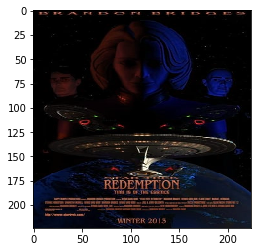

In [48]:
plt.imshow(train['Numpy_Img'][0])

In [49]:
train['Numpy_Img'][0].shape

(224, 224, 3)

In [50]:
type(train['Numpy_Img'][0])

numpy.ndarray

In [51]:
train_mat = train.values

In [52]:
test_mat = test.values

In [53]:
type(train_mat)

numpy.ndarray

In [60]:
train_mat[0,-1].shape

(224, 224, 3)

In [61]:
np.save('train_img.npy', train_mat)

In [62]:
np.save('test_img.npy', test_mat)

In [63]:
train_imgs = np.load('train_img.npy')

In [64]:
len(train_imgs)

54

In [65]:
train_imgs[:5, :]

array([[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0, 0.0, 0.0, 0,
        array([[[ 85, 175, 216],
        [ 85, 175, 216],
        [ 85, 175, 216],
        ...,
        [ 93, 180, 224],
        [ 93, 180, 224],
        [ 93, 180, 224]],

       [[ 83, 170, 211],
        [ 83, 170, 211],
        [ 82, 170, 211],
        ...,
        [ 91, 178, 222],
        [ 91, 178, 222],
        [ 91, 178, 222]],

       [[ 83, 168, 208],
        [ 83, 168, 208],
        [ 83, 168, 208],
        ...,
        [ 90, 177, 221],
        [ 90, 177, 221],
        [ 90, 177, 221]],

       ...,

       [[ 51,  25,   8],
        [ 51,  25,   8],
        [ 51,  25,   8],
        ...,
        [ 15,  11,  10],
        [ 16,  12,  11],
        [ 16,  12,  11]],

       [[ 51,  25,   8],
        [ 51,  25,   8],
        [ 51,  25,   8],
        ...,
        [ 15,  11,  10],
        [ 16,  12,  11],
        [ 16,  12,  11]],

       [[ 51,  25,   8],
        [ 51,  25,   8],